In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

In [9]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
rural=pd.read_csv("군자살율.csv", encoding="CP949")
urban=pd.read_csv('시구자살율.csv', encoding="CP949")

In [12]:
rural_total=rural.loc[rural["성별"]=="계"]
urban_total=urban.loc[urban["성별"]=="계"]

# 인구 10만명당 한국 지역별 자살률

통계청 인구십만명당 자살률(시도/시/군/구): https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21121E&vw_cd=MT_GTITLE01&list_id=112&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=K1&path=%25EC%25A3%25BC%25EC%25A0%259C%25EB%25B3%2584%2520%253E%2520%25EC%2582%25AC%25ED%259A%258C%25ED%2586%25B5%25ED%2595%25A9%25EC%259D%25B8%25EA%25B5%25AC%25EC%258B%25AD%25EB%25A7%258C%25EB%25AA%2585%25EB%258B%25B9%2520%25EC%259E%2590%25EC%2582%25B4%25EB%25A5%25A0%28%25EC%258B%259C%25EB%258F%2584%252F%25EC%258B%259C%252F%25EA%25B5%25B0%252F%25EA%25B5%25AC%29

In [13]:
rural_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 303
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    102 non-null    object
 1   성별      102 non-null    object
 2   1998    102 non-null    object
 3   1999    102 non-null    object
 4   2000    102 non-null    object
 5   2001    102 non-null    object
 6   2002    102 non-null    object
 7   2003    102 non-null    object
 8   2004    102 non-null    object
 9   2005    102 non-null    object
 10  2006    102 non-null    object
 11  2007    102 non-null    object
 12  2008    102 non-null    object
 13  2009    102 non-null    object
 14  2010    102 non-null    object
 15  2011    102 non-null    object
 16  2012    102 non-null    object
 17  2013    102 non-null    object
 18  2014    102 non-null    object
 19  2015    102 non-null    object
 20  2016    102 non-null    object
 21  2017    102 non-null    object
 22  2018    102 non-null    ob

In [14]:
urban_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 873
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군구별         292 non-null    object 
 1   성별           292 non-null    object 
 2   항목           292 non-null    object 
 3   단위           292 non-null    object 
 4   1998 년       262 non-null    float64
 5   1999 년       262 non-null    float64
 6   2000 년       262 non-null    float64
 7   2001 년       260 non-null    float64
 8   2002 년       262 non-null    float64
 9   2003 년       263 non-null    float64
 10  2004 년       263 non-null    float64
 11  2005 년       266 non-null    float64
 12  2006 년       267 non-null    float64
 13  2007 년       267 non-null    float64
 14  2008 년       269 non-null    float64
 15  2009 년       268 non-null    float64
 16  2010 년       272 non-null    float64
 17  2011 년       272 non-null    float64
 18  2012 년       273 non-null    float64
 19  2013 년  

#농촌의 인구 10만명당 자살률

In [15]:
rural_total["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '기장군', '대구광역시', '달성군', '인천광역시', '강화군',
       '옹진군', '광주광역시', '대전광역시', '울산광역시', '울주군', '세종특별자치시', '경기도', '양주군',
       '여주군', '화성군', '광주군', '연천군', '포천군', '강원도', '홍천군', '횡성군', '영월군',
       '평창군', '정선군', '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '충청북도',
       '청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군', '음성군', '단양군', '증평군',
       '충청남도', '금산군', '연기군', '부여군', '서천군', '청양군', '홍성군', '예산군', '태안군',
       '당진군', '전라북도', '완주군', '진안군', '무주군', '장수군', '임실군', '순창군', '고창군',
       '부안군', '전라남도', '담양군', '곡성군', '구례군', '고흥군', '보성군', '화순군', '장흥군',
       '강진군', '해남군', '영암군', '무안군', '함평군', '영광군', '장성군', '완도군', '경상북도',
       '군위군', '의성군', '청송군', '영양군', '영덕군', '청도군', '고령군', '성주군', '칠곡군',
       '예천군', '봉화군', '경상남도', '의령군', '함안군', '창녕군', '남해군', '하동군', '산청군',
       '함양군', '제주도', '북제주군', '남제주군'], dtype=object)

In [16]:
rural_total=rural_total.loc[(rural_total["시군구별"]!="전국")&(rural_total["시군구별"]!="서울특별시")&(rural_total["시군구별"]!="부산광역시")&(rural_total["시군구별"]!="대구광역시")&(rural_total["시군구별"]!="인천광역시")&(rural_total["시군구별"]!="광주광역시")&(rural_total["시군구별"]!="대전광역시")&(rural_total["시군구별"]!="울산광역시")&(rural_total["시군구별"]!="세종특별자치시")&(rural_total["시군구별"]!="경기도")&(rural_total["시군구별"]!="대전광역시")&(rural_total["시군구별"]!="충청북도")&(rural_total["시군구별"]!="충청남도")&(rural_total["시군구별"]!="전라북도")&(rural_total["시군구별"]!="전라남도")&(rural_total["시군구별"]!="제주도")&(rural_total["시군구별"]!="경상북도")]

In [17]:
rural_total["시군구별"].unique()

array(['기장군', '달성군', '강화군', '옹진군', '울주군', '양주군', '여주군', '화성군', '광주군',
       '연천군', '포천군', '강원도', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군',
       '화천군', '양구군', '인제군', '고성군', '양양군', '청원군', '보은군', '옥천군', '영동군',
       '진천군', '괴산군', '음성군', '단양군', '증평군', '금산군', '연기군', '부여군', '서천군',
       '청양군', '홍성군', '예산군', '태안군', '당진군', '완주군', '진안군', '무주군', '장수군',
       '임실군', '순창군', '고창군', '부안군', '담양군', '곡성군', '구례군', '고흥군', '보성군',
       '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군', '함평군', '영광군', '장성군',
       '완도군', '군위군', '의성군', '청송군', '영양군', '영덕군', '청도군', '고령군', '성주군',
       '칠곡군', '예천군', '봉화군', '경상남도', '의령군', '함안군', '창녕군', '남해군', '하동군',
       '산청군', '함양군', '북제주군', '남제주군'], dtype=object)

In [18]:
rural_total=rural_total.set_index("시군구별")

In [19]:
rural_total.drop("성별", axis=1, inplace=True)

In [20]:
rural_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
시군구별,,,,,,,,,,,,,,,,,,,,,,,
기장군,31.0,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37.0,22.9,25.2,27.0,17.9,33.5,23.1
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7
강화군,27.5,23.4,26.7,41.8,43.8,52.0,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55.0,26.3,93.5,35.9,23.3,44.9,38.0,36.9,40.8,39.6,24.4,19.4,66.6,28.1,-,14.5,24.6
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19.0,28.7,23.9,30.0,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
하동군,32.0,37.5,36.6,25.0,25.6,34.8,40.7,33.3,34.0,38.7,40.4,47.4,34.9,43.8,46.1,33.9,32.4,34.4,24.2,22.5,20.9,27.8,33.0
산청군,43.3,37.4,26.4,42.0,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1


In [22]:
r_total=rural_total.copy()

In [23]:
for i in range(0,23):
  for j in range(0,86):
    if r_total.iloc[j, i]=="-":
      r_total.iloc[j, i]=np.NaN
    else:
      r_total.iloc[j, i]=float(r_total.iloc[j, i])

In [24]:
r_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
시군구별,,,,,,,,,,,,,,,,,,,,,,,
기장군,31,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37,22.9,25.2,27,17.9,33.5,23.1
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7
강화군,27.5,23.4,26.7,41.8,43.8,52,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55,26.3,93.5,35.9,23.3,44.9,38,36.9,40.8,39.6,24.4,19.4,66.6,28.1,NaN,14.5,24.6
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19,28.7,23.9,30,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
하동군,32,37.5,36.6,25,25.6,34.8,40.7,33.3,34,38.7,40.4,47.4,34.9,43.8,46.1,33.9,32.4,34.4,24.2,22.5,20.9,27.8,33
산청군,43.3,37.4,26.4,42,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1


In [25]:
r_total['total']=0

In [26]:
r_total=r_total.transpose()

In [27]:
r_total['년평균']=0

In [29]:
for i in range(0,86):
  local_mean=r_total.iloc[:-1, i].mean()
  r_total.iloc[-1, i]=local_mean

In [30]:
r_total=r_total.transpose()

In [31]:
r_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
기장군,31,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37,22.9,25.2,27,17.9,33.5,23.1,29.0609
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7,22.9826
강화군,27.5,23.4,26.7,41.8,43.8,52,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8,35.4826
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55,26.3,93.5,35.9,23.3,44.9,38,36.9,40.8,39.6,24.4,19.4,66.6,28.1,NaN,14.5,24.6,35.5818
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19,28.7,23.9,30,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2,25.8652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
산청군,43.3,37.4,26.4,42,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4,41.3261
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1,36.5348
북제주군,41.3,24.8,19.9,21,19.9,34.6,39.3,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75


In [32]:
for i in range(0,24):
  local_mean=r_total.iloc[:-1, i].mean()
  r_total.iloc[-1, i]=local_mean

In [33]:
r_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
기장군,31,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37,22.9,25.2,27,17.9,33.5,23.1,29.0609
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7,22.9826
강화군,27.5,23.4,26.7,41.8,43.8,52,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8,35.4826
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55,26.3,93.5,35.9,23.3,44.9,38,36.9,40.8,39.6,24.4,19.4,66.6,28.1,NaN,14.5,24.6,35.5818
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19,28.7,23.9,30,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2,25.8652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
산청군,43.3,37.4,26.4,42,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4,41.3261
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1,36.5348
북제주군,41.3,24.8,19.9,21,19.9,34.6,39.3,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75


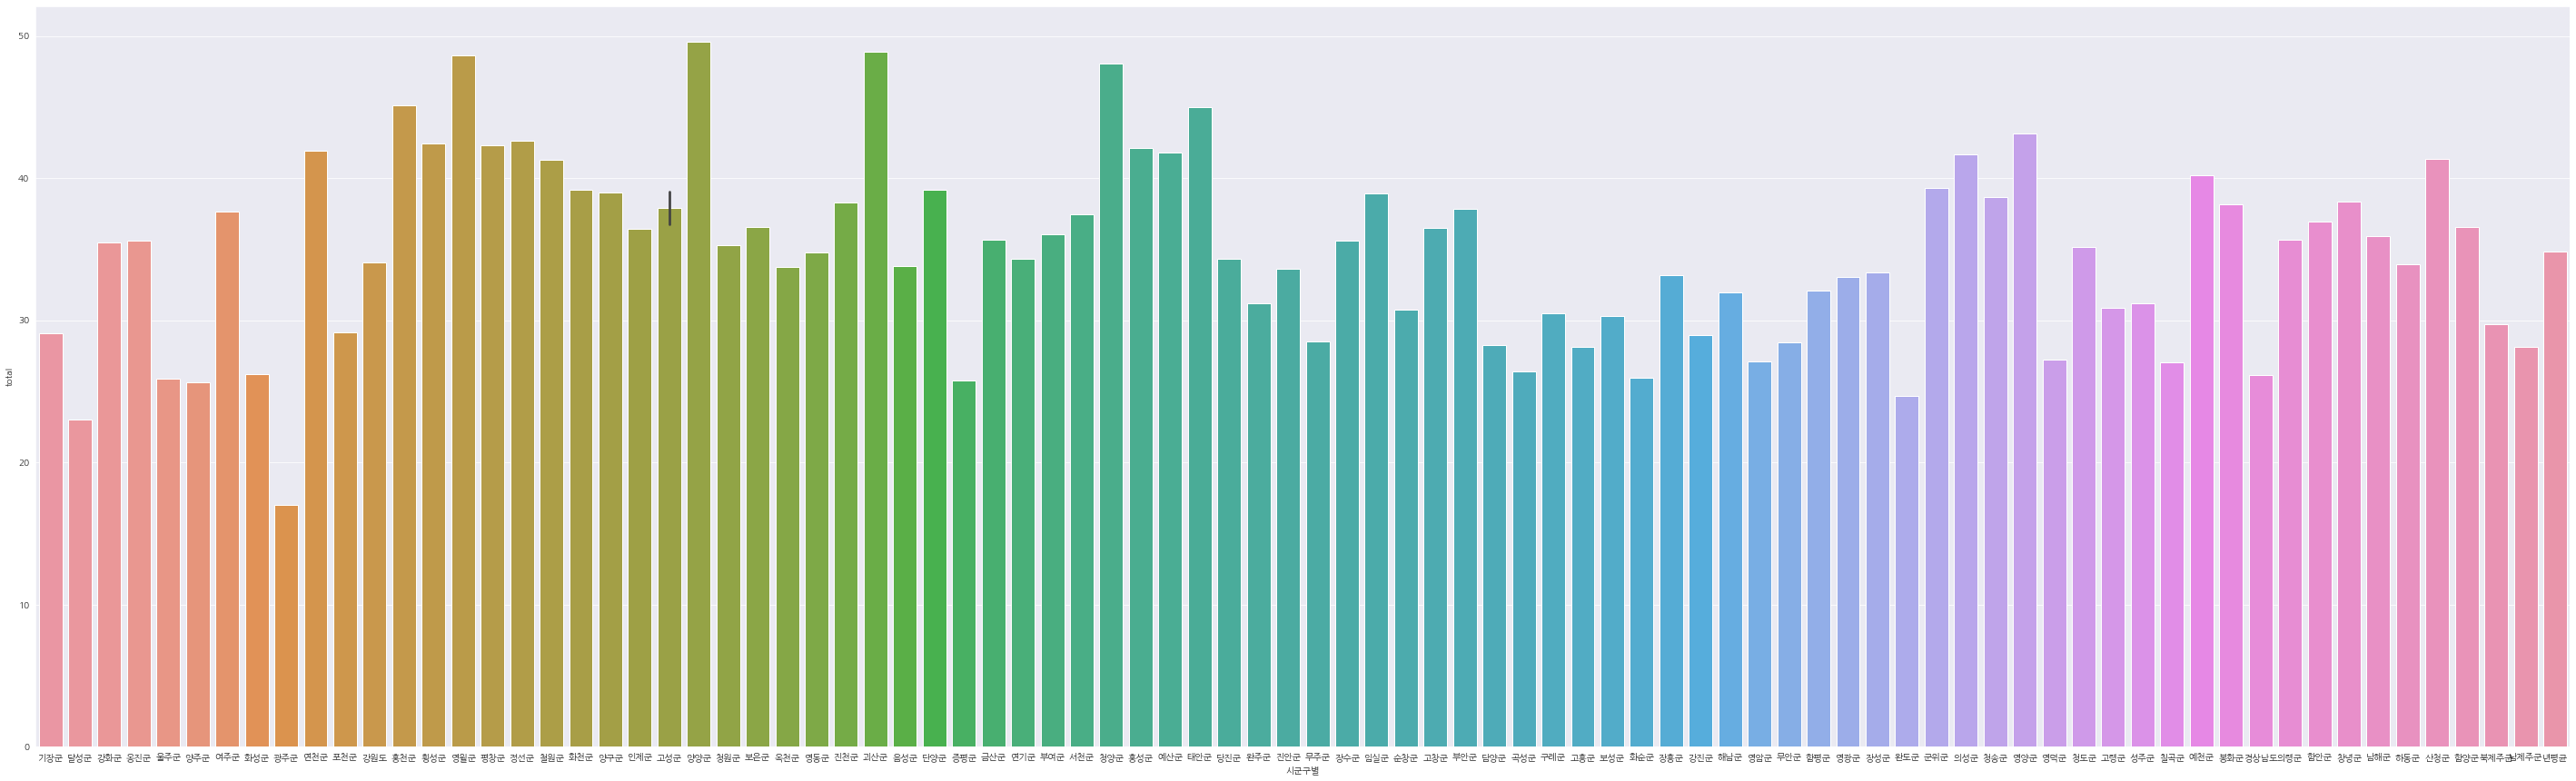

In [55]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(50,15)

sns.barplot(data=r_total, x=r_total.index, y=r_total.total, ax=ax1)

In [58]:
rt=r_total.transpose()

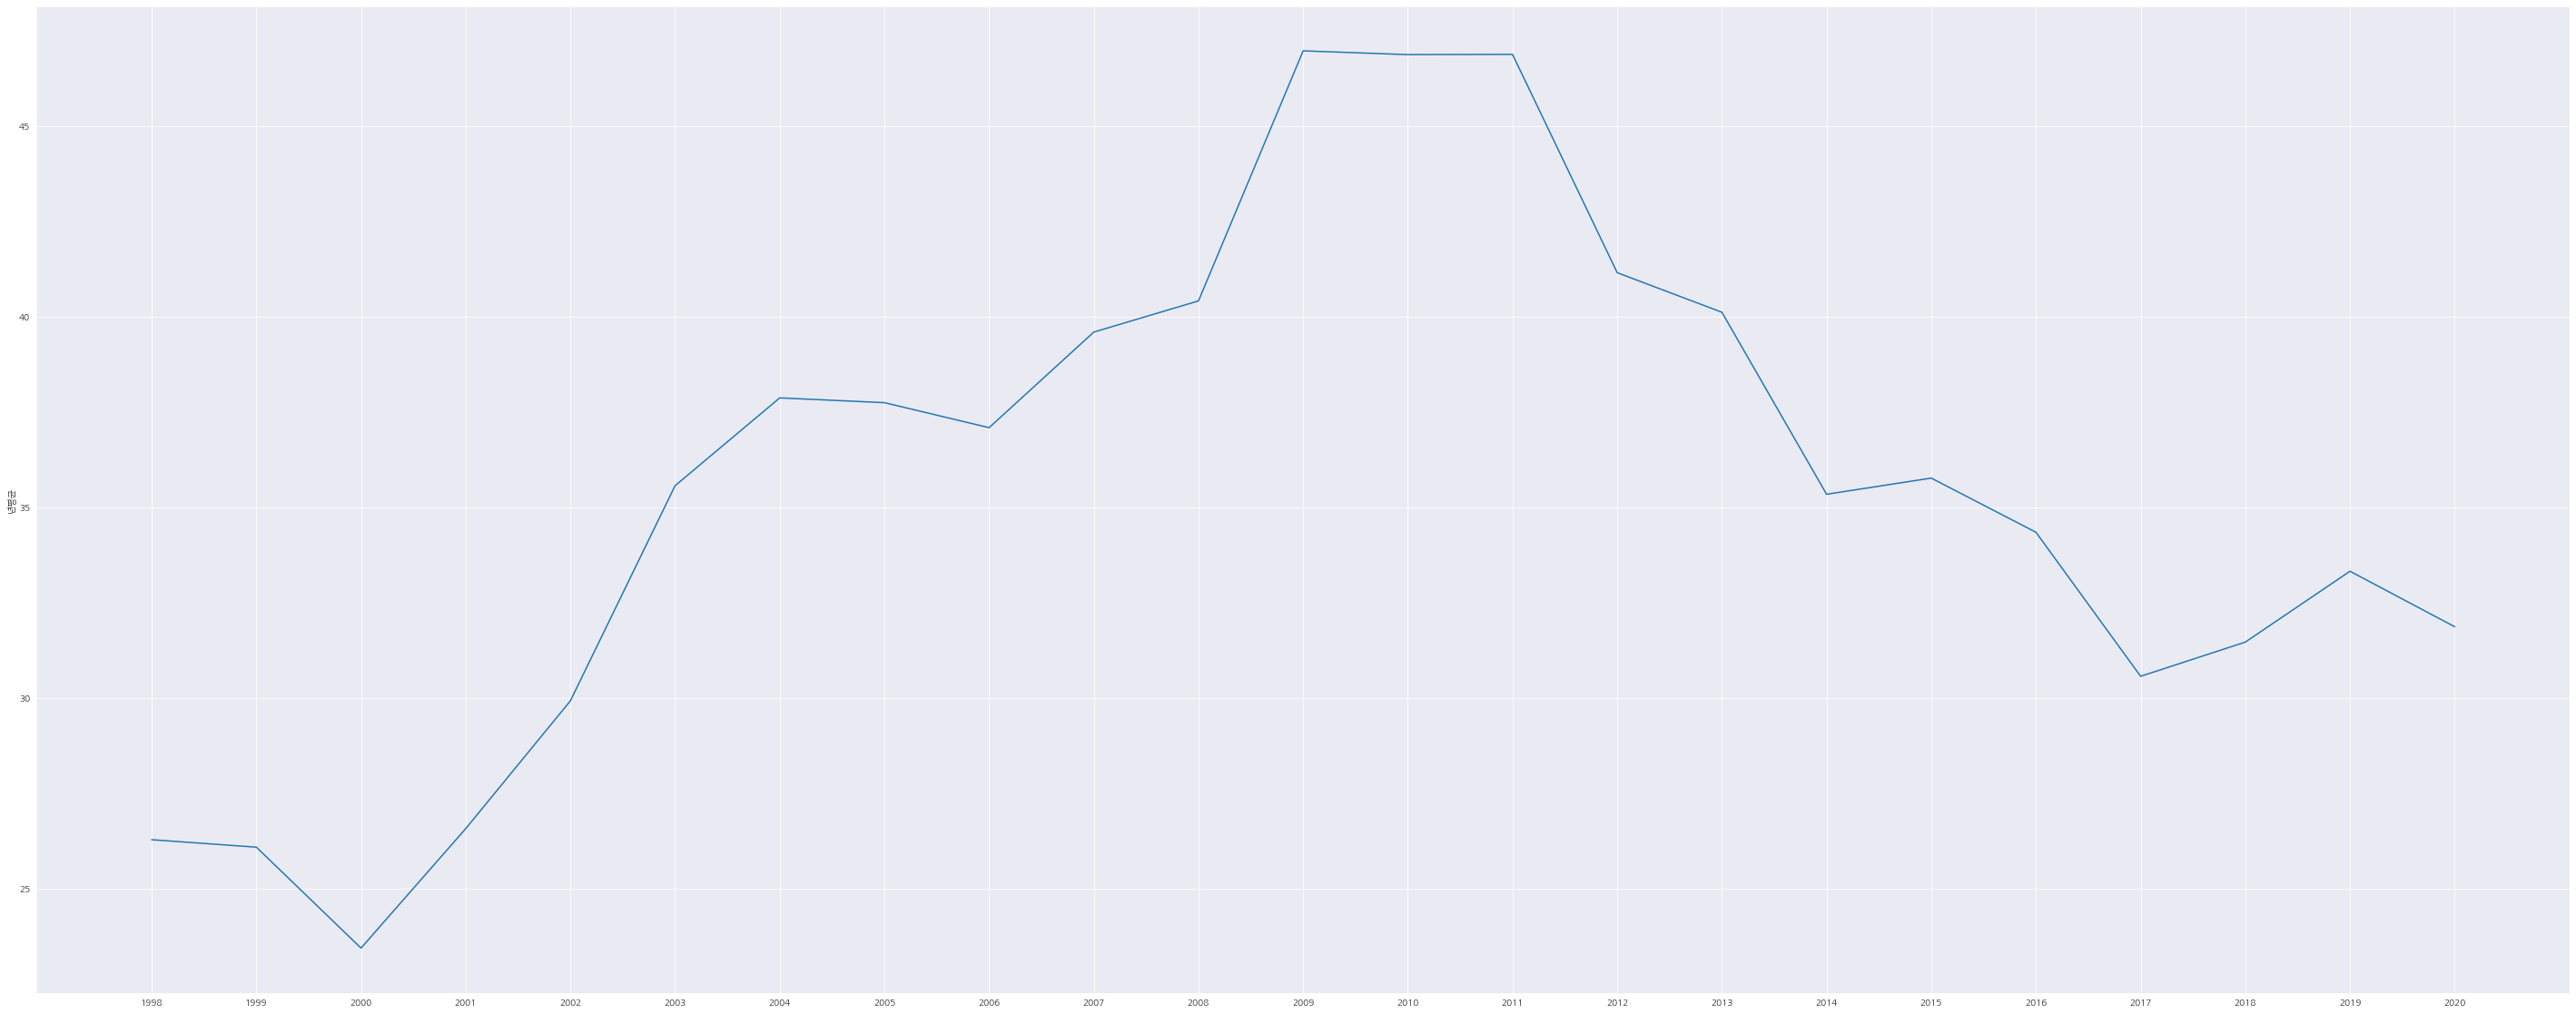

In [62]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(50,20)

sns.lineplot(data=rt['년평균'][:-1], ax=ax1)

In [63]:
r_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
기장군,31,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37,22.9,25.2,27,17.9,33.5,23.1,29.0609
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7,22.9826
강화군,27.5,23.4,26.7,41.8,43.8,52,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8,35.4826
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55,26.3,93.5,35.9,23.3,44.9,38,36.9,40.8,39.6,24.4,19.4,66.6,28.1,NaN,14.5,24.6,35.5818
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19,28.7,23.9,30,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2,25.8652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
산청군,43.3,37.4,26.4,42,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4,41.3261
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1,36.5348
북제주군,41.3,24.8,19.9,21,19.9,34.6,39.3,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75


#도시의 인구 10만명당 자살률

In [65]:
urban_total

,시군구별,성별,항목,단위,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,Unnamed: 27
0,전국,계,인구십만명당 자살률,십만명당,18.6,15.1,13.7,14.6,18.0,22.7,23.9,24.8,22.0,24.9,26.0,31.0,31.2,31.7,28.1,28.5,27.3,26.5,25.6,24.3,26.6,26.9,25.7,NaN
3,서울특별시,계,인구십만명당 자살률,십만명당,16.7,10.4,9.1,9.4,13.6,16.5,18.7,19.9,17.3,20.3,21.6,26.1,26.2,26.9,23.8,25.6,24.7,23.2,23.0,21.3,22.5,22.5,22.7,NaN
6,종로구,계,인구십만명당 자살률,십만명당,15.1,15.5,10.7,13.0,15.3,19.0,13.1,29.7,19.6,16.8,20.8,25.9,28.2,26.8,16.1,29.9,23.5,23.2,20.9,30.4,20.2,26.6,17.9,NaN
9,중구,계,인구십만명당 자살률,십만명당,18.4,10.5,13.5,10.6,17.8,22.0,25.5,28.2,13.0,19.9,31.5,30.0,38.0,30.3,29.4,25.8,31.9,25.2,28.1,22.3,19.8,20.5,16.5,NaN
12,용산구,계,인구십만명당 자살률,십만명당,16.8,9.2,10.1,9.1,18.9,19.3,20.8,26.5,18.6,24.8,23.2,28.1,25.3,30.4,26.7,25.8,30.6,23.5,23.9,23.7,23.3,18.3,22.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,거창군,계,인구십만명당 자살률,십만명당,24.9,29.4,17.1,21.7,25.0,32.9,30.3,19.9,26.4,37.5,33.0,41.1,42.8,50.9,30.3,35.1,33.4,19.1,31.8,33.5,25.7,29.1,24.4,NaN
864,합천군,계,인구십만명당 자살률,십만명당,30.5,24.9,35.3,16.5,32.4,37.3,40.7,25.8,49.4,56.1,54.0,35.0,69.5,33.8,46.1,24.1,34.1,22.3,45.7,27.6,37.0,20.0,22.6,NaN
867,제주도,계,인구십만명당 자살률,십만명당,27.5,21.1,16.5,18.4,17.9,27.2,23.7,27.9,20.6,25.1,28.9,32.6,31.4,31.0,31.5,32.9,27.2,24.5,24.0,26.7,30.6,31.7,30.0,NaN
870,제주시,계,인구십만명당 자살률,십만명당,21.3,16.9,12.7,14.9,12.5,20.3,18.7,21.7,18.4,22.5,29.5,32.0,29.6,29.1,29.1,32.1,26.6,22.0,24.0,27.2,31.6,31.8,27.3,NaN


In [70]:
urban_total=urban_total.loc[(urban_total["시군구별"]!="전국")&(urban_total["시군구별"]!="서울특별시")&(urban_total["시군구별"]!="부산광역시")&(urban_total["시군구별"]!="대구광역시")&(urban_total["시군구별"]!="인천광역시")&(urban_total["시군구별"]!="광주광역시")&(urban_total["시군구별"]!="대전광역시")&(urban_total["시군구별"]!="울산광역시")&(urban_total["시군구별"]!="경기도")&(urban_total["시군구별"]!="대전광역시")&(urban_total["시군구별"]!="충청북도")&(urban_total["시군구별"]!="충청남도")&(urban_total["시군구별"]!="전라북도")&(urban_total["시군구별"]!="전라남도")&(urban_total["시군구별"]!="제주도")&(urban_total["시군구별"]!="경상북도")]

In [72]:
urban_total["local"]=0

In [ ]:
urban_total=urban_total.reset_index()
urban_total

In [75]:
for i in range(0,277):
  x=urban_total["시군구별"][i]
  y=x[-1]
  urban_total["local"][i]=y

In [78]:
urban_total=urban_total.loc[urban_total['local']!="군"]

In [84]:
urban_total.drop(["index","성별","항목","단위","Unnamed: 27"], axis=1, inplace=True)

In [87]:
urban_total=urban_total[urban_total["시군구별"]!="세종특별자치시"]

In [88]:
urban_total=urban_total.set_index("시군구별")

In [95]:
urban_total=urban_total.loc[urban_total["local"]!="도"]

In [96]:
urban_total.drop("local", axis=1, inplace=True)

In [100]:
urban_total["total"]=0

In [101]:
u_total=urban_total.copy()

In [102]:
u_total

,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
종로구,15.1,15.5,10.7,13.0,15.3,19.0,13.1,29.7,19.6,16.8,20.8,25.9,28.2,26.8,16.1,29.9,23.5,23.2,20.9,30.4,20.2,26.6,17.9,0
중구,18.4,10.5,13.5,10.6,17.8,22.0,25.5,28.2,13.0,19.9,31.5,30.0,38.0,30.3,29.4,25.8,31.9,25.2,28.1,22.3,19.8,20.5,16.5,0
용산구,16.8,9.2,10.1,9.1,18.9,19.3,20.8,26.5,18.6,24.8,23.2,28.1,25.3,30.4,26.7,25.8,30.6,23.5,23.9,23.7,23.3,18.3,22.8,0
성동구,17.6,13.0,9.7,8.8,14.4,17.1,19.5,17.1,17.3,24.9,25.0,28.6,27.1,26.4,25.4,29.9,20.5,26.4,23.9,22.6,20.3,19.1,24.0,0
광진구,15.9,9.2,5.6,5.4,10.3,15.6,15.9,18.3,15.2,18.9,18.1,22.4,27.2,25.8,17.2,24.1,18.6,20.2,15.6,20.2,22.2,19.2,19.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
밀양시,20.2,28.3,16.7,25.9,31.2,28.6,33.4,39.3,34.6,30.4,26.1,47.1,42.8,46.9,31.5,28.8,34.6,33.7,28.9,30.8,30.1,25.7,23.0,0
거제시,22.7,19.2,15.5,16.4,17.2,23.9,25.0,25.9,21.2,23.9,22.6,23.5,27.4,24.0,20.1,25.6,22.6,21.1,35.3,26.8,30.7,33.9,23.6,0
양산시,21.1,17.7,13.2,13.2,16.7,31.2,34.9,28.9,30.3,23.1,26.1,35.3,36.1,32.1,25.1,23.0,26.0,25.4,24.7,25.4,33.6,30.7,29.1,0


In [103]:
for i in range(0,24):
  local_mean=u_total.iloc[i, :-1].mean()
  u_total.iloc[i, -1]=local_mean

In [105]:
u_total=u_total.transpose()
u_total['년평균']=0

In [ ]:
u_total

In [113]:
for i in range(0,193):
  local_mean=u_total.iloc[i, :-1].mean()
  u_total.iloc[i, -1]=local_mean

In [117]:
u_total=u_total.transpose()

In [118]:
ut=u_total.transpose()
u_total

,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
종로구,15.100000,15.500000,10.700000,13.000000,15.300000,19.000000,13.100000,29.700000,19.600000,16.800000,20.800000,25.900000,28.200000,26.800000,16.100000,29.900000,23.500000,23.200000,20.900000,30.400000,20.200000,26.600000,17.900000,20.791304
중구,18.400000,10.500000,13.500000,10.600000,17.800000,22.000000,25.500000,28.200000,13.000000,19.900000,31.500000,30.000000,38.000000,30.300000,29.400000,25.800000,31.900000,25.200000,28.100000,22.300000,19.800000,20.500000,16.500000,22.986957
용산구,16.800000,9.200000,10.100000,9.100000,18.900000,19.300000,20.800000,26.500000,18.600000,24.800000,23.200000,28.100000,25.300000,30.400000,26.700000,25.800000,30.600000,23.500000,23.900000,23.700000,23.300000,18.300000,22.800000,21.726087
성동구,17.600000,13.000000,9.700000,8.800000,14.400000,17.100000,19.500000,17.100000,17.300000,24.900000,25.000000,28.600000,27.100000,26.400000,25.400000,29.900000,20.500000,26.400000,23.900000,22.600000,20.300000,19.100000,24.000000,20.808696
광진구,15.900000,9.200000,5.600000,5.400000,10.300000,15.600000,15.900000,18.300000,15.200000,18.900000,18.100000,22.400000,27.200000,25.800000,17.200000,24.100000,18.600000,20.200000,15.600000,20.200000,22.200000,19.200000,19.800000,17.430435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
거제시,22.700000,19.200000,15.500000,16.400000,17.200000,23.900000,25.000000,25.900000,21.200000,23.900000,22.600000,23.500000,27.400000,24.000000,20.100000,25.600000,22.600000,21.100000,35.300000,26.800000,30.700000,33.900000,23.600000,23.830435
양산시,21.100000,17.700000,13.200000,13.200000,16.700000,31.200000,34.900000,28.900000,30.300000,23.100000,26.100000,35.300000,36.100000,32.100000,25.100000,23.000000,26.000000,25.400000,24.700000,25.400000,33.600000,30.700000,29.100000,26.213043
제주시,21.300000,16.900000,12.700000,14.900000,12.500000,20.300000,18.700000,21.700000,18.400000,22.500000,29.500000,32.000000,29.600000,29.100000,29.100000,32.100000,26.600000,22.000000,24.000000,27.200000,31.600000,31.800000,27.300000,23.991304


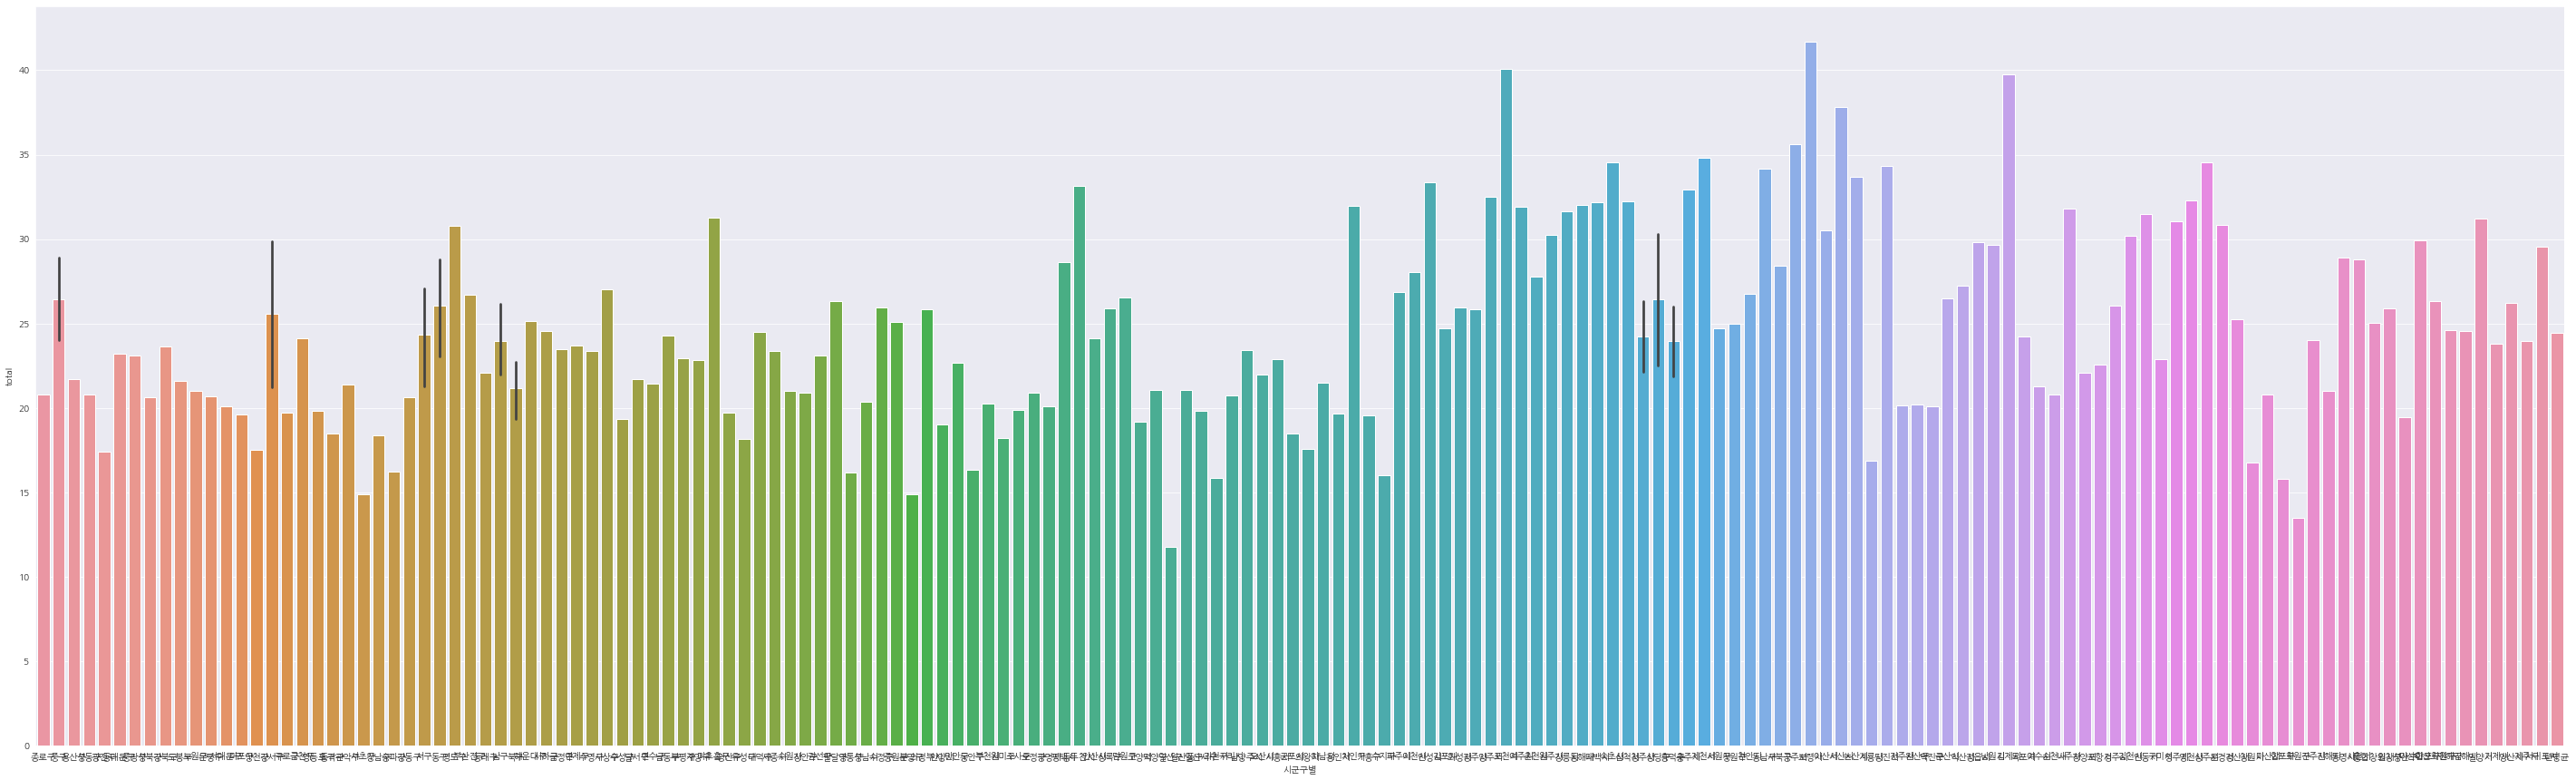

In [119]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(50,15)

sns.barplot(data=u_total, x=u_total.index, y=u_total.total, ax=ax1)

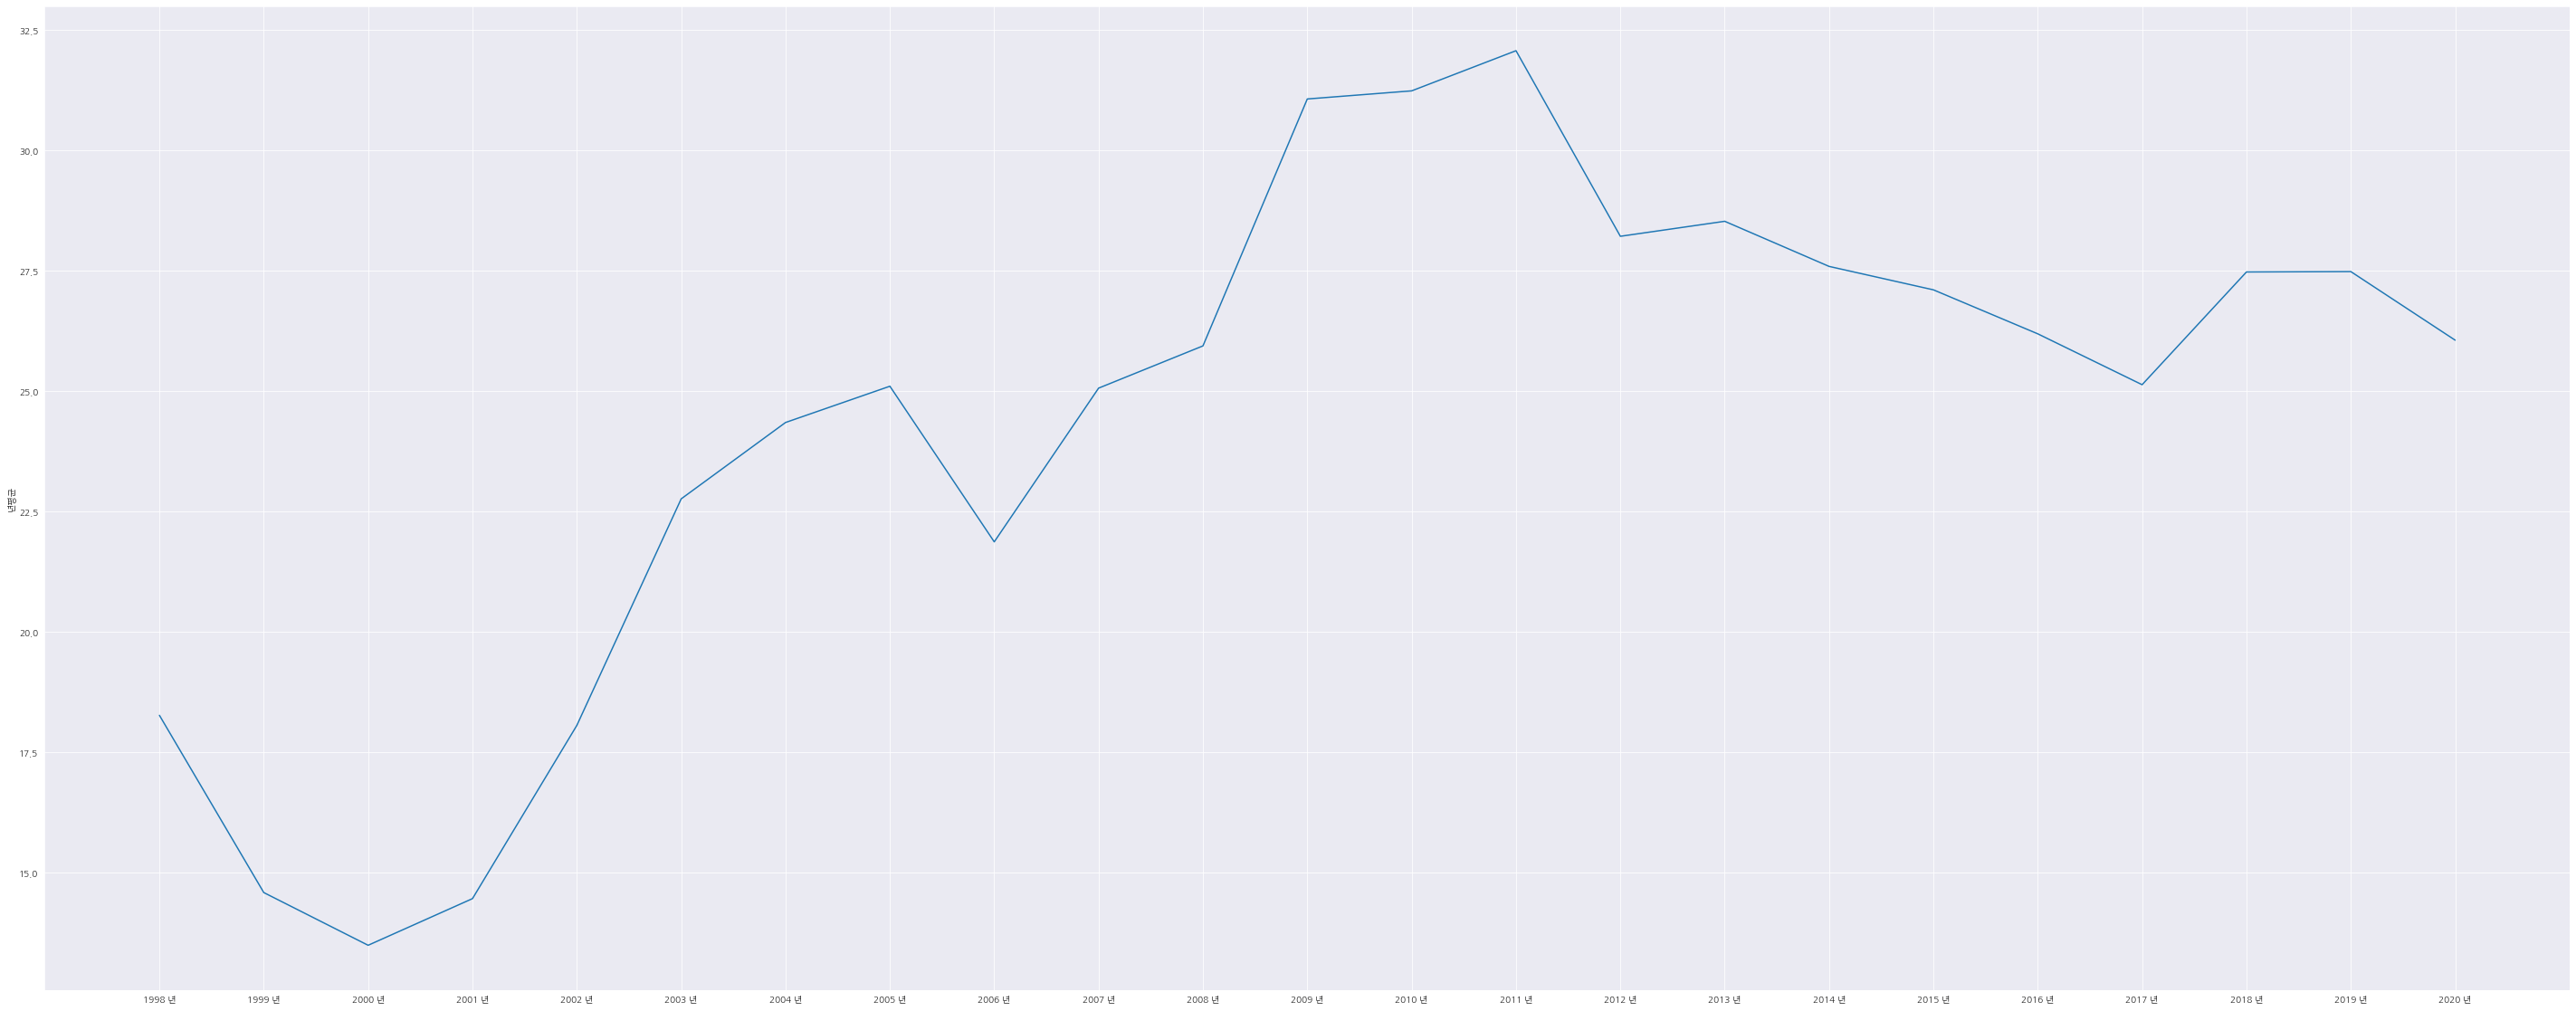

In [120]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(50,20)

sns.lineplot(data=ut['년평균'][:-1], ax=ax1)

In [123]:
#r_total.to_csv("r_total.csv", index=False)
#u_total.to_csv("u_total.csv", index=False)

# 도시 자살율과 농촌 자살율 비교

In [125]:
print(u_total['total'].mean())

24.55634409495743


In [126]:
print(r_total['total'].mean())

34.81906933246227


In [127]:
print(ut['년평균'].mean())

24.437927162733803


In [128]:
print(rt['년평균'].mean())

35.41595280305371


In [129]:
ut['년평균']

1998 년    18.266871
1999 년    14.586503
2000 년    13.492025
2001 년    14.460736
2002 년    18.057576
2003 년    22.761905
2004 년    24.347619
2005 년    25.100581
2006 년    21.869186
2007 년    25.061047
2008 년    25.937931
2009 년    31.065517
2010 년    31.233898
2011 년    32.067797
2012 년    28.213966
2013 년    28.525556
2014 년    27.589011
2015 년    27.102198
2016 년    26.188827
2017 년    25.132402
2018 년    27.473184
2019 년    27.481006
2020 년    26.056983
total     24.437927
Name: 년평균, dtype: float64

In [130]:
rt['년평균']

1998     26.2791
1999     26.0837
2000     23.4372
2001      26.569
2002     29.9214
2003     35.5622
2004     37.8659
2005     37.7402
2006      37.085
2007     39.5912
2008     40.4087
2009     46.9662
2010     46.8675
2011     46.8737
2012     41.1487
2013     40.1117
2014     35.3382
2015     35.7618
2016     34.3421
2017     30.5645
2018     31.4613
2019     33.3197
2020     31.8645
total    34.8191
Name: 년평균, dtype: object

In [131]:
r_total['total']

시군구별
기장군     29.0609
달성군     22.9826
강화군     35.4826
옹진군     35.5818
울주군     25.8652
         ...   
산청군     41.3261
함양군     36.5348
북제주군      29.75
남제주군      28.15
년평균     34.8191
Name: total, Length: 87, dtype: object

In [138]:
r_total=r_total.rename(index={'년평균':"농촌평균"})
u_total=u_total.rename(index={'년평균':"도시평균"})

In [139]:
r_total['total']

시군구별
기장군     29.0609
달성군     22.9826
강화군     35.4826
옹진군     35.5818
울주군     25.8652
         ...   
산청군     41.3261
함양군     36.5348
북제주군      29.75
남제주군      28.15
농촌평균    34.8191
Name: total, Length: 87, dtype: object

In [140]:
u_total['total']

시군구별
종로구     20.791304
중구      22.986957
용산구     21.726087
성동구     20.808696
광진구     17.430435
          ...    
거제시     23.830435
양산시     26.213043
제주시     23.991304
서귀포시    29.534783
도시평균    24.437927
Name: total, Length: 193, dtype: float64

In [ ]:
!pip install wordcloud

In [142]:
r_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,total
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
기장군,31,26.9,20.2,19.9,23.6,41.6,39.4,41.3,17.6,36.5,33.6,31.7,28.3,31.6,31.7,26.9,37,22.9,25.2,27,17.9,33.5,23.1,29.0609
달성군,23.9,14.9,12.8,14.2,24.4,29.4,24.2,22.3,24.6,18.8,27.2,24.2,23.7,31.4,27.6,26.2,16.3,28.7,21.5,18.7,27.6,27.3,18.7,22.9826
강화군,27.5,23.4,26.7,41.8,43.8,52,32.3,38.3,39.7,36.4,43.3,37.2,62.8,40.6,30.2,43.7,27.1,31.4,26.7,26.5,32.2,30.7,21.8,35.4826
옹진군,7.3,28.6,42.8,42.8,21.3,28.2,55,26.3,93.5,35.9,23.3,44.9,38,36.9,40.8,39.6,24.4,19.4,66.6,28.1,NaN,14.5,24.6,35.5818
울주군,41.5,17.1,15.3,21.5,21.1,30.1,19,28.7,23.9,30,22.4,27.4,22.3,31.2,34.1,32.3,18.5,25.5,23.8,23.3,30.9,29.8,25.2,25.8652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
산청군,43.3,37.4,26.4,42,43.3,28.8,45.6,71.1,38.9,33.8,48.4,48.6,45.6,56.7,56.6,42.3,28.1,50.5,44.7,27.8,25.1,31.1,34.4,41.3261
함양군,28.7,29.1,19.1,28.4,20.2,32.3,49.6,38.3,33.9,48.9,12.3,44.4,49.1,53.9,59.2,49.5,32.2,37.4,32.5,47.7,42.7,27.8,23.1,36.5348
북제주군,41.3,24.8,19.9,21,19.9,34.6,39.3,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75


In [145]:
rural_list=[]
for i in range(0,86):
  name=r_total.index[i]
  num=int(r_total['total'][i])
  for j in range(num):
    rural_list.append(name)

<Figure size 720x432 with 0 Axes>

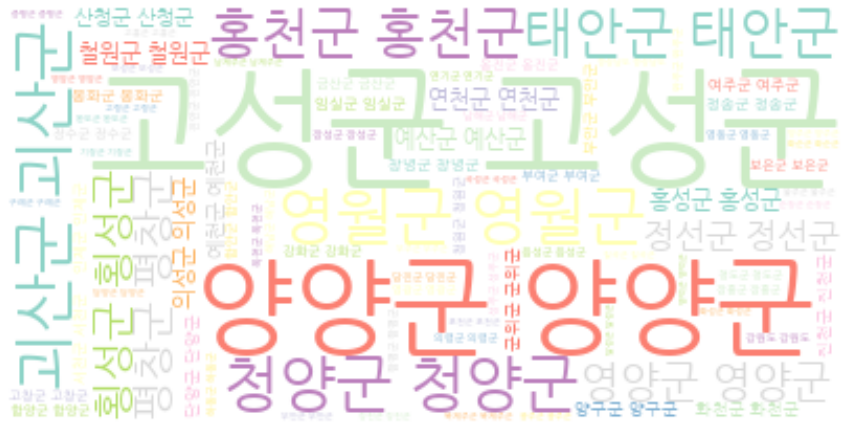

In [157]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in rural_list)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white", font_path="NanumGothic").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(15, 15))
plt.show()

In [159]:
urban_list=[]
for i in range(0,192):
  name=u_total.index[i]
  num=int(u_total['total'][i])
  for j in range(num):
    urban_list.append(name)

<Figure size 720x432 with 0 Axes>

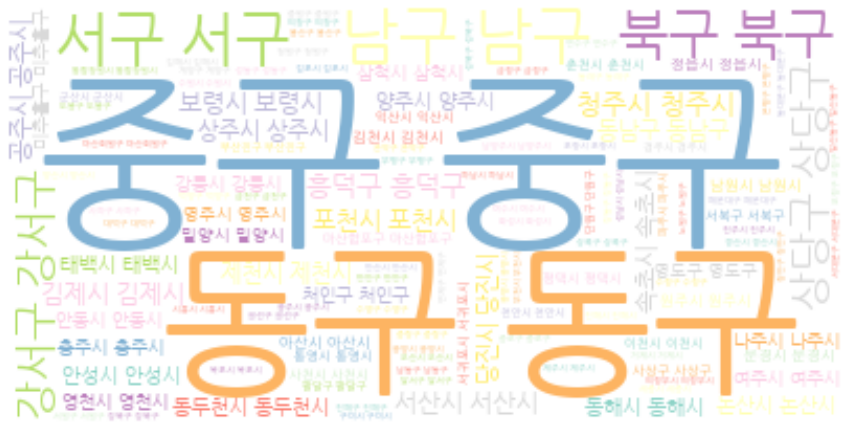

In [160]:
text = " ".join(str(each) for each in urban_list)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white", font_path="NanumGothic").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(15, 15))
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
r_train, r_test=train_test_split(r_total, test_size=0.6)

In [269]:
len(r_total.index)

87

In [181]:
r_test.shape

(53, 24)

In [178]:
u_train, u_test=train_test_split(u_total, test_size=0.3)

In [270]:
len(u_total.index)

193

In [179]:
u_test.shape

(58, 24)

In [182]:
r_test=r_test.iloc[:50, :]
u_test=u_test.iloc[:50, :]

In [183]:
import scipy

scipy.stats.ttest_rel(r_test['total'], u_test['total'])

Ttest_relResult(statistic=8.094115551019033, pvalue=1.372242719200876e-10)

# 전국

In [186]:
rural

,시군구별,성별,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,전국,계,18.6,15.1,13.7,14.6,18.0,22.7,23.9,24.8,22.0,24.9,26.0,31.0,31.2,31.7,28.1,28.5,27.3,26.5,25.6,24.3,26.6,26.9,25.7
1,전국,남,26.7,21.1,19.0,20.3,24.7,31.2,32.6,33.1,29.7,31.6,33.4,39.9,41.4,43.3,38.2,39.8,38.4,37.5,36.2,34.9,38.5,38.0,35.5
2,전국,여,10.4,9.1,8.4,8.7,11.2,14.1,15.0,16.6,14.2,18.2,18.7,22.1,21.0,20.1,18.0,17.3,16.1,15.5,15.0,13.8,14.8,15.8,15.9
3,서울특별시,계,16.7,10.4,9.1,9.4,13.6,16.5,18.7,19.9,17.3,20.3,21.6,26.1,26.2,26.9,23.8,25.6,24.7,23.2,23.0,21.3,22.5,22.5,22.7
4,서울특별시,남,23.5,14.6,12.9,12.6,18.8,22.2,25.8,26.2,24.1,24.7,26.1,32.2,34.2,37.4,32.1,35.7,34.7,32.1,32.5,30.7,31.3,30.8,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,북제주군,남,50.6,31.8,25.8,35.9,31.8,53.0,52.6,47.8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
302,북제주군,여,32.0,17.9,14.0,6.0,8.0,15.9,25.7,26.3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
303,남제주군,계,26.8,26.9,17.9,27.0,30.1,38.4,26.9,31.2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
304,남제주군,남,41.0,41.0,25.6,38.6,41.8,50.2,42.8,35.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [218]:
total=urban.loc[urban['성별']=="계"]

In [219]:
total=total.reset_index()

In [221]:
total["local"]=0

for i in range(0,292):
  x=total.iloc[i, 1]
  y=x[-1]
  total['local'][i]=y

In [223]:
total=total.loc[(total["local"]=="시")|(total["local"]=="군")]

In [225]:
total.drop(["index","성별","항목","단위","Unnamed: 27", "local"], axis=1, inplace=True)

In [226]:
total=total.set_index("시군구별")

In [234]:
total["지역평균"]=0
for i in range(0,172):
  x=total.iloc[i, :-1].mean()
  total['지역평균'][i]=x

In [235]:
total=total.transpose()
total["년평균"]=0

In [244]:
for i in range(0,24):
  x=total.iloc[i, :-1].mean()
  total.iloc[i, -1]=x

In [246]:
total=total.transpose()
total

,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,지역평균
시군구별,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,16.700000,10.400000,9.100000,9.400000,13.60000,16.500000,18.700000,19.900000,17.300000,20.300000,21.600000,26.100000,26.200000,26.900000,23.800000,25.60000,24.700000,23.200000,23.000000,21.300000,22.500000,22.500000,22.700000,20.000000
부산광역시,19.300000,12.600000,12.800000,15.700000,15.90000,22.000000,27.100000,26.800000,22.500000,25.700000,27.400000,32.100000,32.900000,31.900000,30.000000,29.00000,28.700000,29.000000,27.200000,26.300000,27.900000,30.100000,27.400000,25.000000
기장군,31.000000,26.900000,20.200000,19.900000,23.60000,41.600000,39.400000,41.300000,17.600000,36.500000,33.600000,31.700000,28.300000,31.600000,31.700000,26.90000,37.000000,22.900000,25.200000,27.000000,17.900000,33.500000,23.100000,29.000000
대구광역시,16.600000,15.800000,12.500000,10.700000,14.40000,19.900000,22.000000,22.600000,20.500000,22.900000,25.400000,29.300000,29.700000,29.600000,24.200000,26.80000,25.200000,26.800000,24.200000,24.900000,26.800000,28.700000,26.100000,22.000000
달성군,23.900000,14.900000,12.800000,14.200000,24.40000,29.400000,24.200000,22.300000,24.600000,18.800000,27.200000,24.200000,23.700000,31.400000,27.600000,26.20000,16.300000,28.700000,21.500000,18.700000,27.600000,27.300000,18.700000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
거창군,24.900000,29.400000,17.100000,21.700000,25.00000,32.900000,30.300000,19.900000,26.400000,37.500000,33.000000,41.100000,42.800000,50.900000,30.300000,35.10000,33.400000,19.100000,31.800000,33.500000,25.700000,29.100000,24.400000,30.000000
합천군,30.500000,24.900000,35.300000,16.500000,32.40000,37.300000,40.700000,25.800000,49.400000,56.100000,54.000000,35.000000,69.500000,33.800000,46.100000,24.10000,34.100000,22.300000,45.700000,27.600000,37.000000,20.000000,22.600000,35.000000
제주시,21.300000,16.900000,12.700000,14.900000,12.50000,20.300000,18.700000,21.700000,18.400000,22.500000,29.500000,32.000000,29.600000,29.100000,29.100000,32.10000,26.600000,22.000000,24.000000,27.200000,31.600000,31.800000,27.300000,23.000000


In [247]:
tt=total.transpose()

In [258]:
rtt=rt.copy()

In [259]:
for i in range(0,23):
  x=tt.index[i]
  y=rt.index[i]
  rtt=rtt.rename(index={y:x})

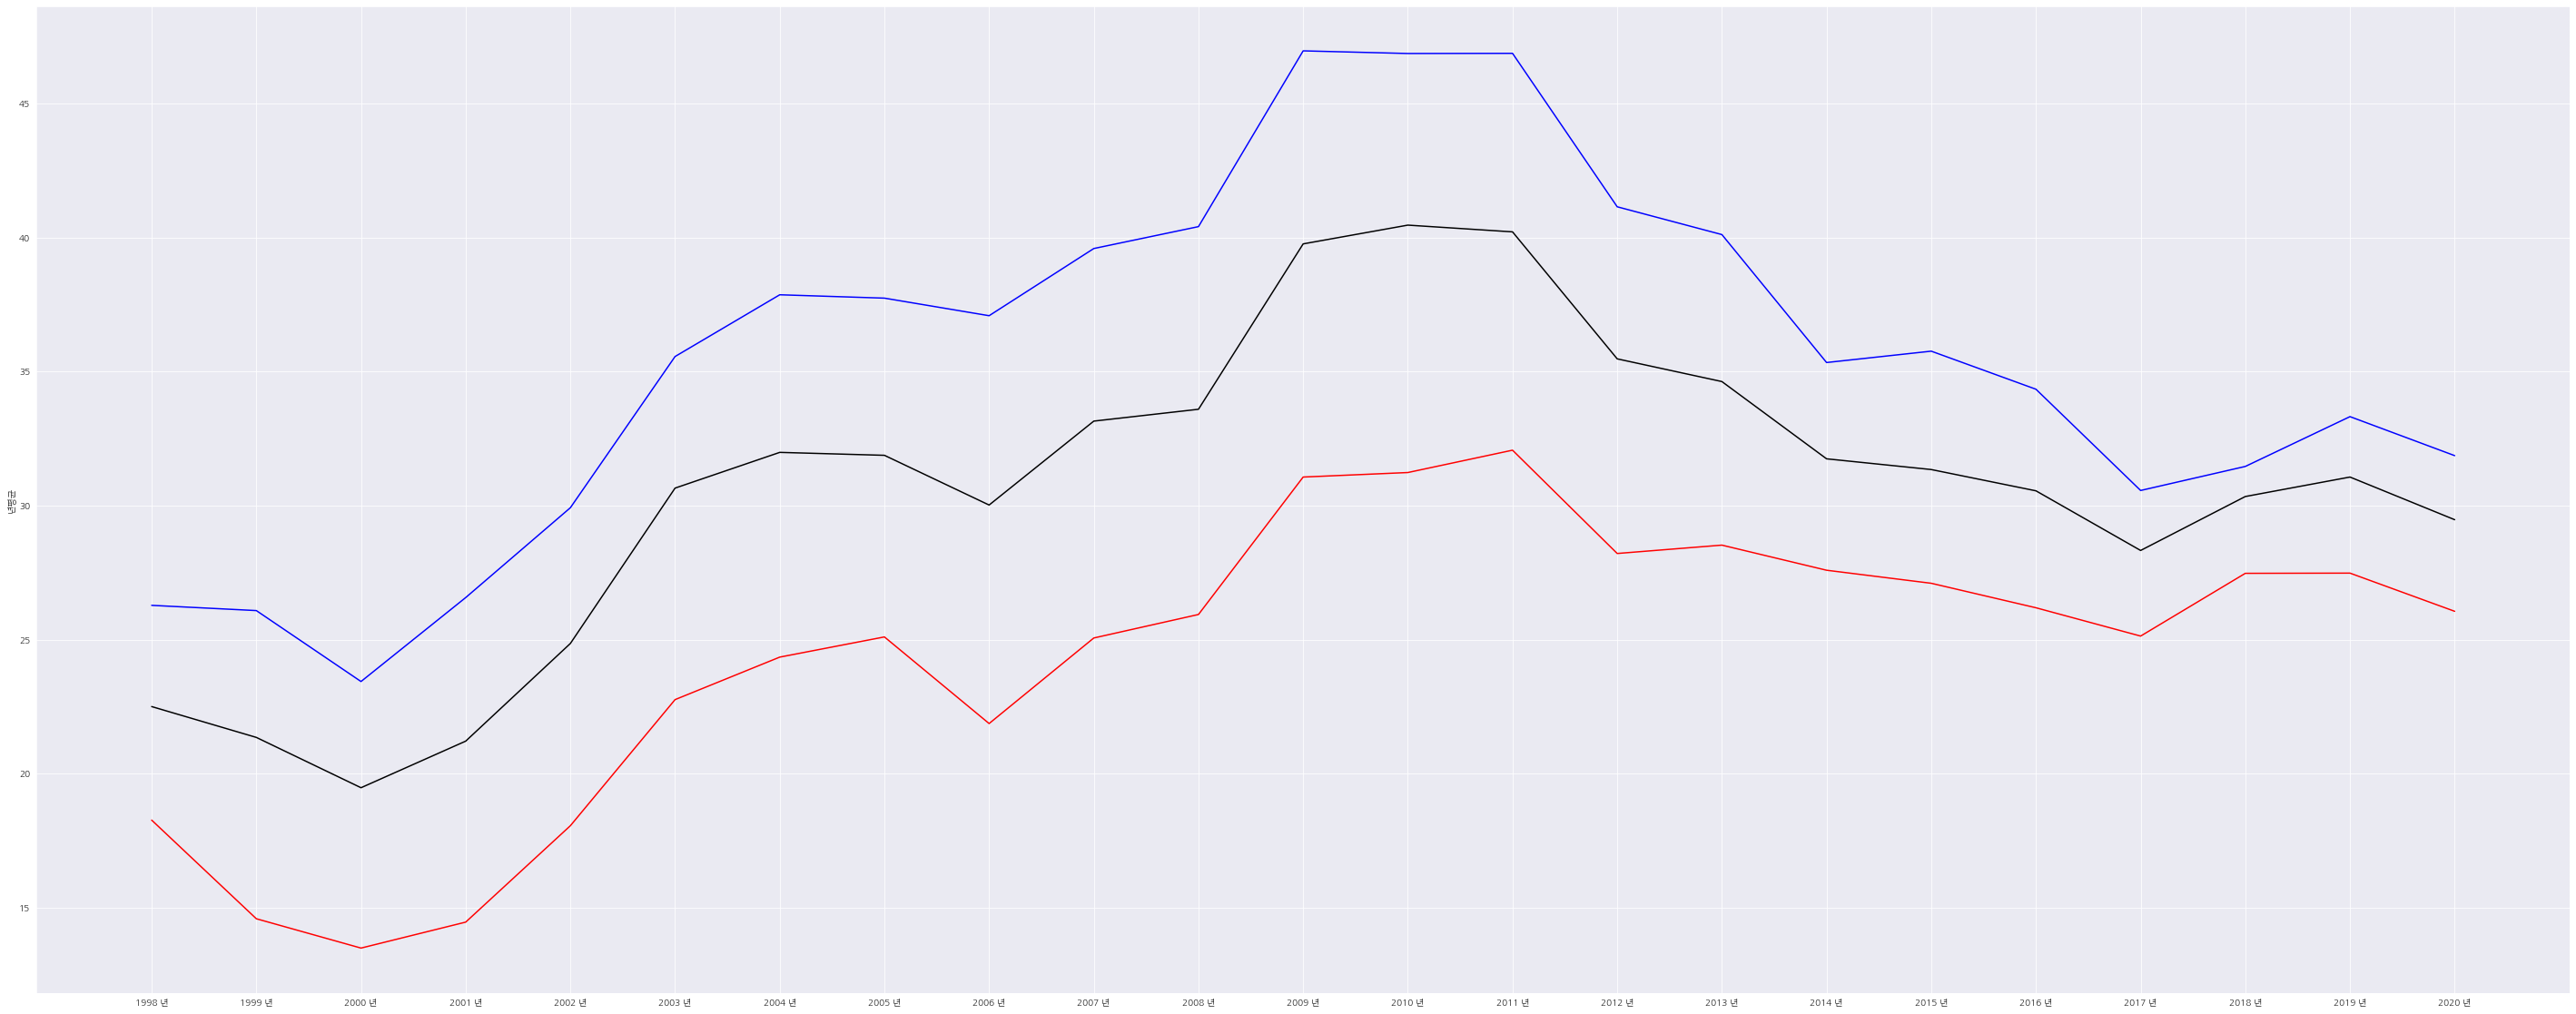

In [261]:
plt.rcParams['font.family'] = 'NanumGothic' 
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(50,20)

sns.lineplot(data=ut['년평균'][:-1], ax=ax1, color="red")
sns.lineplot(data=rtt['년평균'][:-1], ax=ax1, color="blue")
sns.lineplot(data=tt['년평균'][:-1], ax=ax1, color="black")

- 빨간 선: 도시 지역 10만명당 자살율

- 검정 선: 전국 지역 10만명당 자살율

- 파란 선: 농촌 지역 10만명당 자살율

In [265]:
total_list=[]
for i in range(0,172):
  name=total.index[i]
  num=int(total['지역평균'][i])
  for j in range(num):
    total_list.append(name)

<Figure size 1080x720 with 0 Axes>

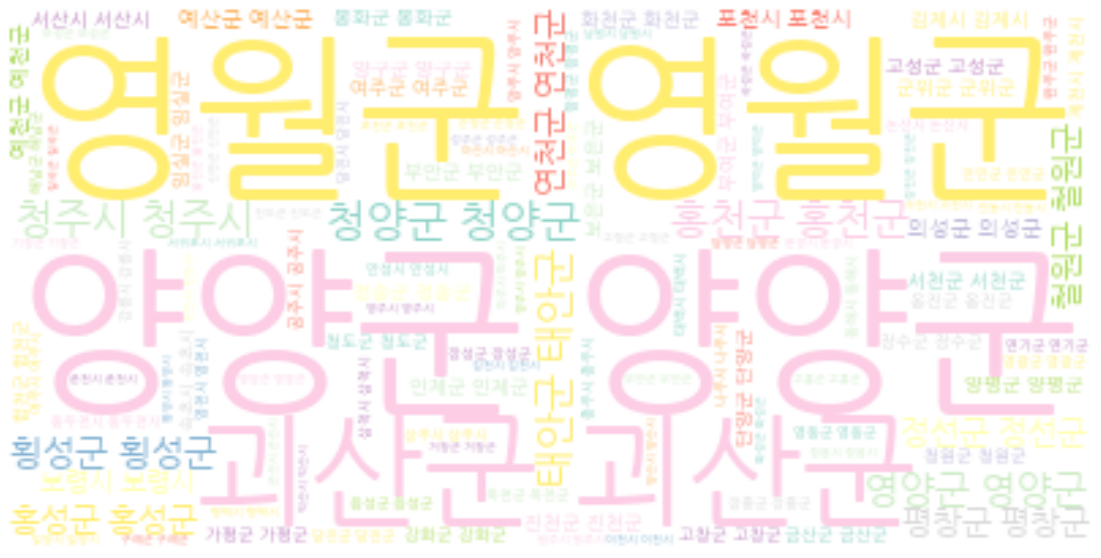

In [268]:
text = " ".join(str(each) for each in total_list)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white", font_path="NanumGothic").generate(text)
plt.figure(figsize=(15,10))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(15, 15))
plt.show()

In [272]:
#total.to_csv("total.csv", index=False)